# Run the server script from package data_summarization_1KGP

Prepare the request parameter selecting the individuals located in the South Asian continent with mutation "rs531730856" and regions aligned on assembly hg19. 

In [21]:
import json
param = \
{'meta': {
    'health_status': "true",
    'super_population_code': ['SAS'],
    'assembly': 'hg19'
    },
 'variants': {
     'with': [{'chrom': 1, 'start': 13271, 'alt':'C'}, {'chrom': 1, 'start': 15272, 'alt': 'T'}]
 }
}
body = json.dumps(param)
print(body)

{"meta": {"health_status": "true", "super_population_code": ["SAS"], "assembly": "hg19"}, "variants": {"with": [{"chrom": 1, "start": 13271, "alt": "C"}, {"chrom": 1, "start": 15272, "alt": "T"}]}}


POST the endpoint \mutations with the prepared JSON parameter

In [22]:
import requests

r = requests.post('http://127.0.0.1:5000/individuals', json=param)
print(' response status code: {}'.format(r.status_code))
response_body = r.json()

response status code: 200


# Inspect response data:
It's a data cube with the numerosity of the individuals grouped on the free-dimensions: gender, dna_source and population (to be intended as country of origin)

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
columns = response_body['columns']
rows = response_body['rows']
df = pd.DataFrame.from_records(rows, columns=columns)

# clean data: removes rows with dna_source = '' beacuse they're wrong; replaces None with ''
df.drop(df[df.dna_source == ''].index, inplace=True)
df.fillna(value='', inplace=True)

df

,chrom,start,alt,occurrence,samples,frequency,dna_source,population,gender
0,1,13271,C,135,131,0.515267,,,
4,1,13271,C,14,13,0.538462,blood,ITU,female
5,1,13271,C,10,10,0.500000,blood,ITU,male
6,1,13271,C,24,23,0.521739,blood,ITU,
7,1,13271,C,17,17,0.500000,blood,PJL,female
...,...,...,...,...,...,...,...,...,...
87,1,15272,T,1,1,0.500000,lcl,GIH,
88,1,15272,T,1,1,0.500000,lcl,STU,female
89,1,15272,T,1,1,0.500000,lcl,STU,
90,1,15272,T,23,21,0.547619,lcl,,


Total count of individuals

In [24]:
total = df.query('population == "" & dna_source == "" & gender == ""')['samples'].iloc[0]
print(total)

131


Comparison of the two mutation frequencies inside the countries in the SAS contitnent

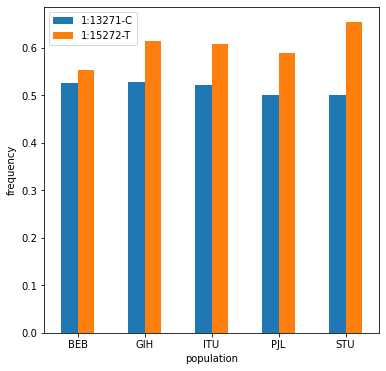

In [96]:
# prepare data frame
df1 = df.drop(df.query('gender != "" | population == "" | dna_source != ""').index)    
df1.drop(['dna_source', 'gender', 'occurrence', 'samples'], inplace=True, axis=1)
df1 = df1.groupby(['population', 'alt']).mean().unstack()
ax = df1.plot(
    kind='bar',
    y='frequency',
    figsize=(6, 6),
    rot=0
)
ax.set_ylabel('frequency')
ax.legend(['1:13271-C', '1:15272-T'])

Distribution of the two mutations in males and females

Text(0, 0.5, 'frequency')

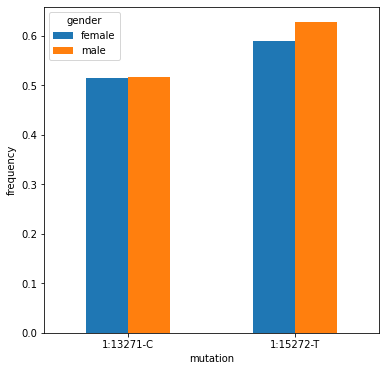

In [99]:
df2 = df.drop(df.query('gender == "" | dna_source != "" | population != ""').index)    
df2['mutation'] = df2['chrom'].astype('str') +':'+ df2['start'].astype('str') +'-'+ df2['alt'] # concatenate chrom,start,alt into single column as an identifier
columns_to_drop = ['population', 'dna_source', 'occurrence', 'samples', 'chrom', 'start', 'alt']
df2.drop(columns_to_drop, inplace=True, axis=1) # removes columns
df2 = df2.groupby(['mutation', 'gender']).mean().unstack()

bar1 = df2.plot(
    kind='bar',
    y='frequency',
    figsize=(6, 6),
    rot=0
)
bar1.set_ylabel('frequency')